# **Chapter 20. Clustering**

In [ ]:
#@title

import requests

url = 'https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py'
r = requests.get(url)

with open('linear_algebra.py', 'w') as f:
    f.write(r.text)

from linear_algebra import Vector, vector_mean, distance, squared_distance, scalar_multiply

## **Introduction to Clustering**

* **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

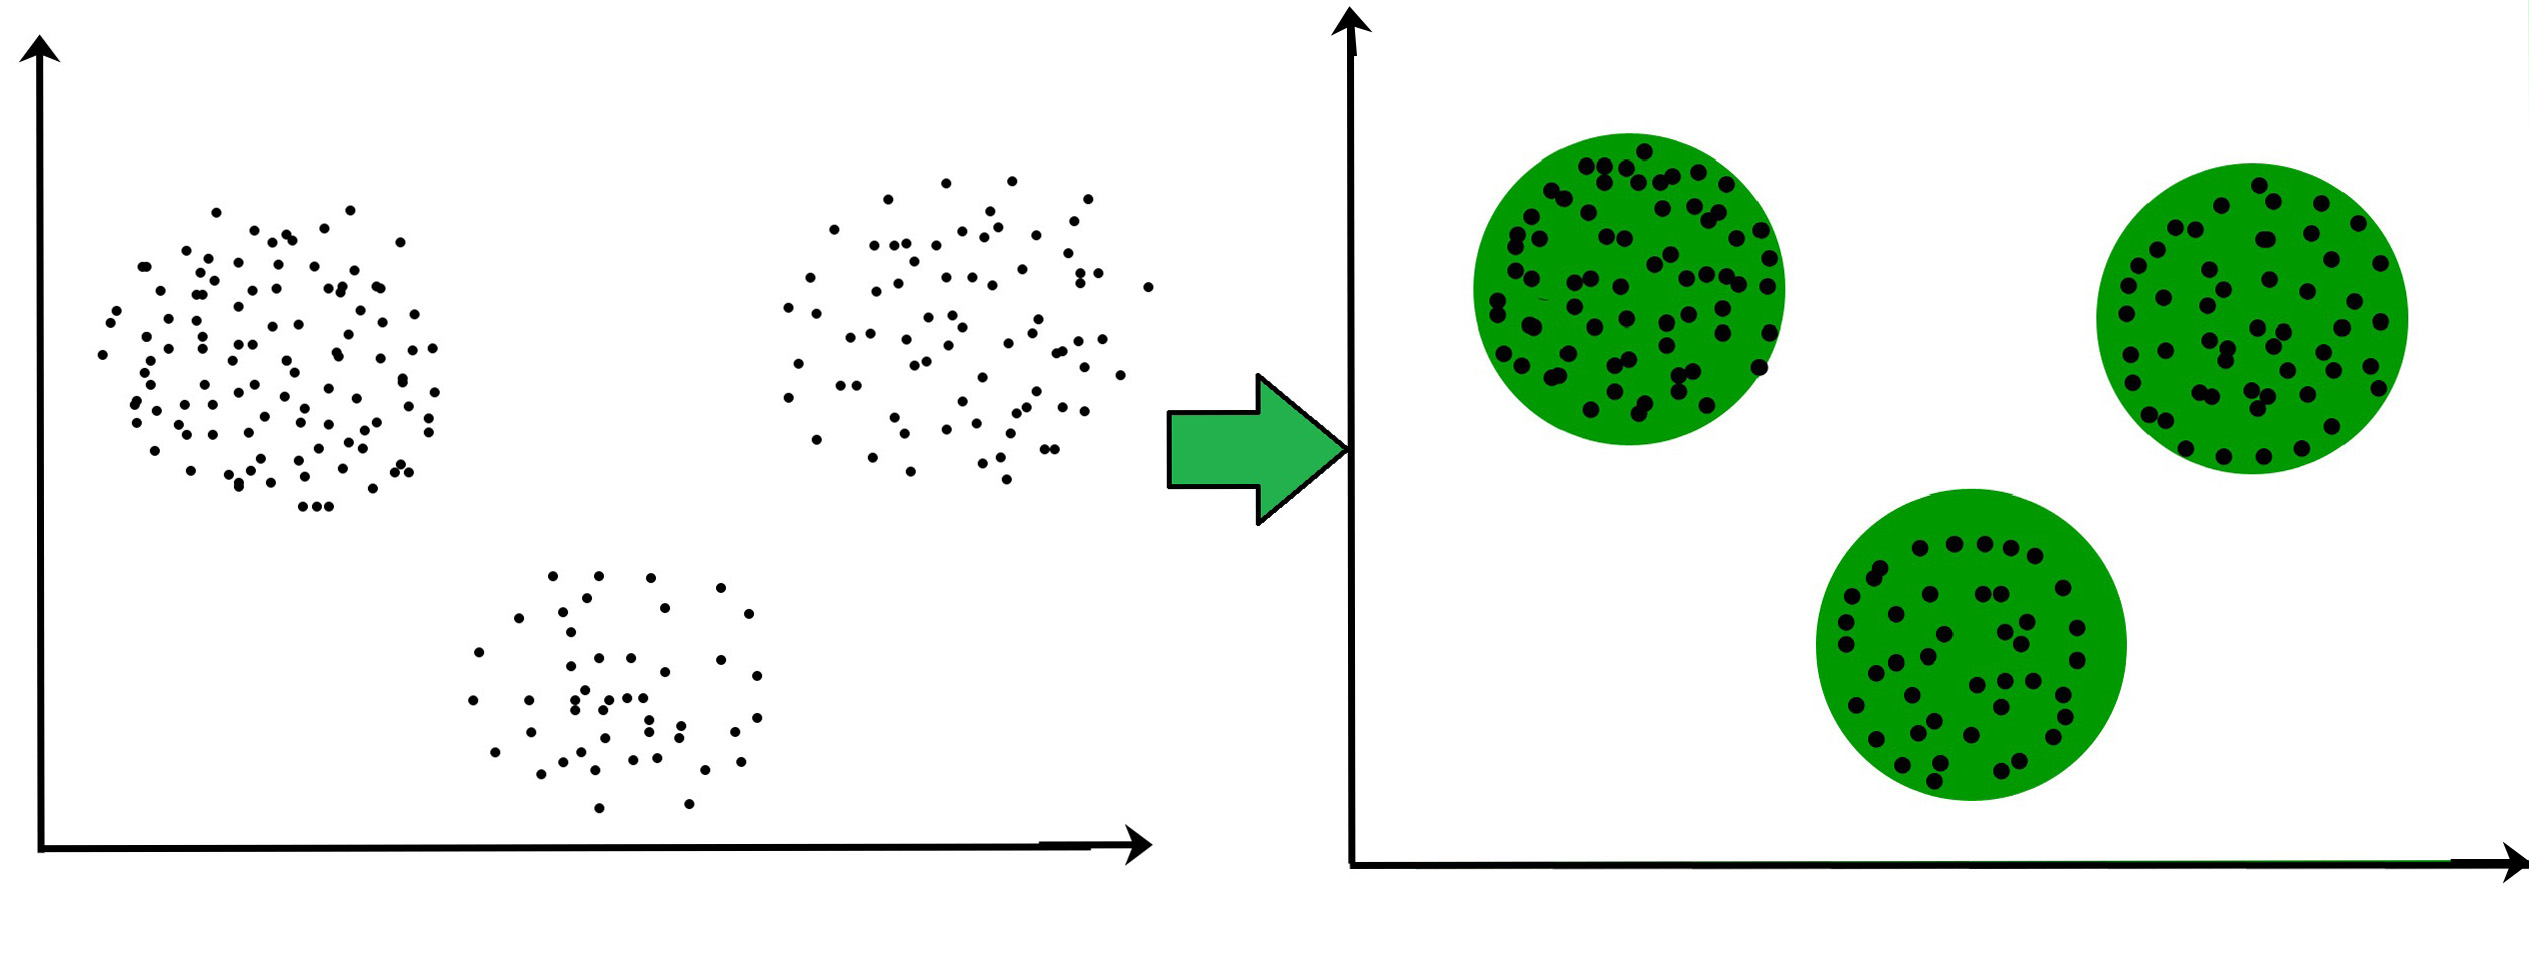

* **Unsupervised learning**: No labels are given to the learning algorithm, leaving it on its own to find structure in its input.

* Clustering can be considered the most important unsupervised learning problem.

## **Applications**

* **Customer segmentation** is the subdivision of a market into discrete customer groups that share similar characteristics. Customer segmentation can be a powerful means to identify unsatisfied customer needs.

* The most common ways in which businesses segment their customer base are:
>* *Demographic information*, such as gender, age, familial and marital status, income, education, and occupation.
>* *Geographical information*, which differs depending on the scope of the company. For localized businesses, this information might pertain to specific towns or counties. For larger companies, it might mean a customer's city, state, or even country of residence.
>* *Psychographics*, such as social class, lifestyle, and personality traits.
>* *Behavioral data*, such as spending and consumption habits, product/service usage, and desired benefits.

* Customer segmentation can be used for determining appropriate product pricing;
developing customized marketing campaigns; designing an optimal distribution strategy; choosing specific product features for deployment; or prioritizing new product development efforts.

* Image segmentation

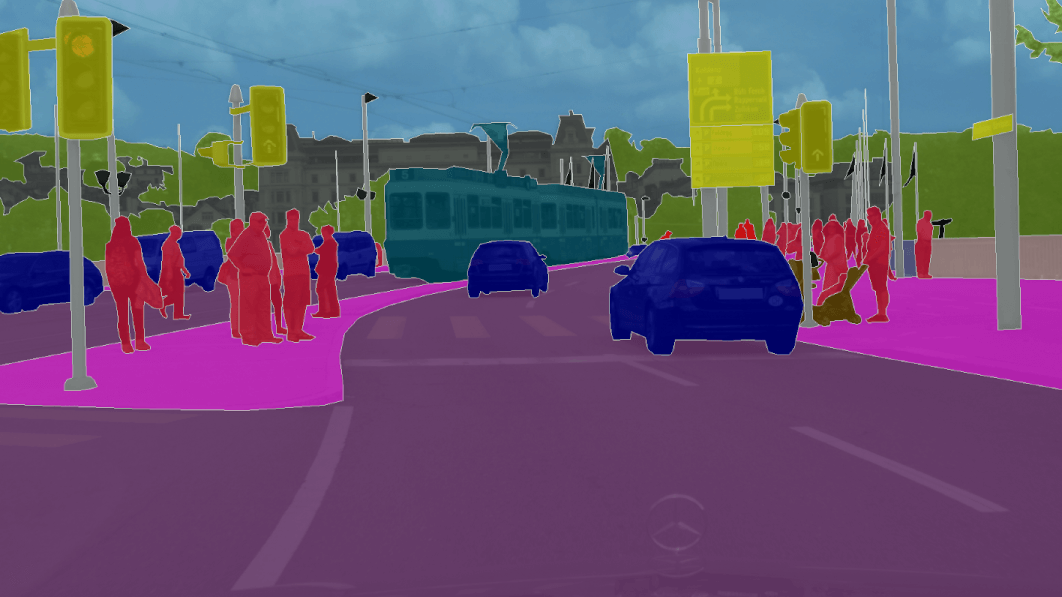

* Image clustering

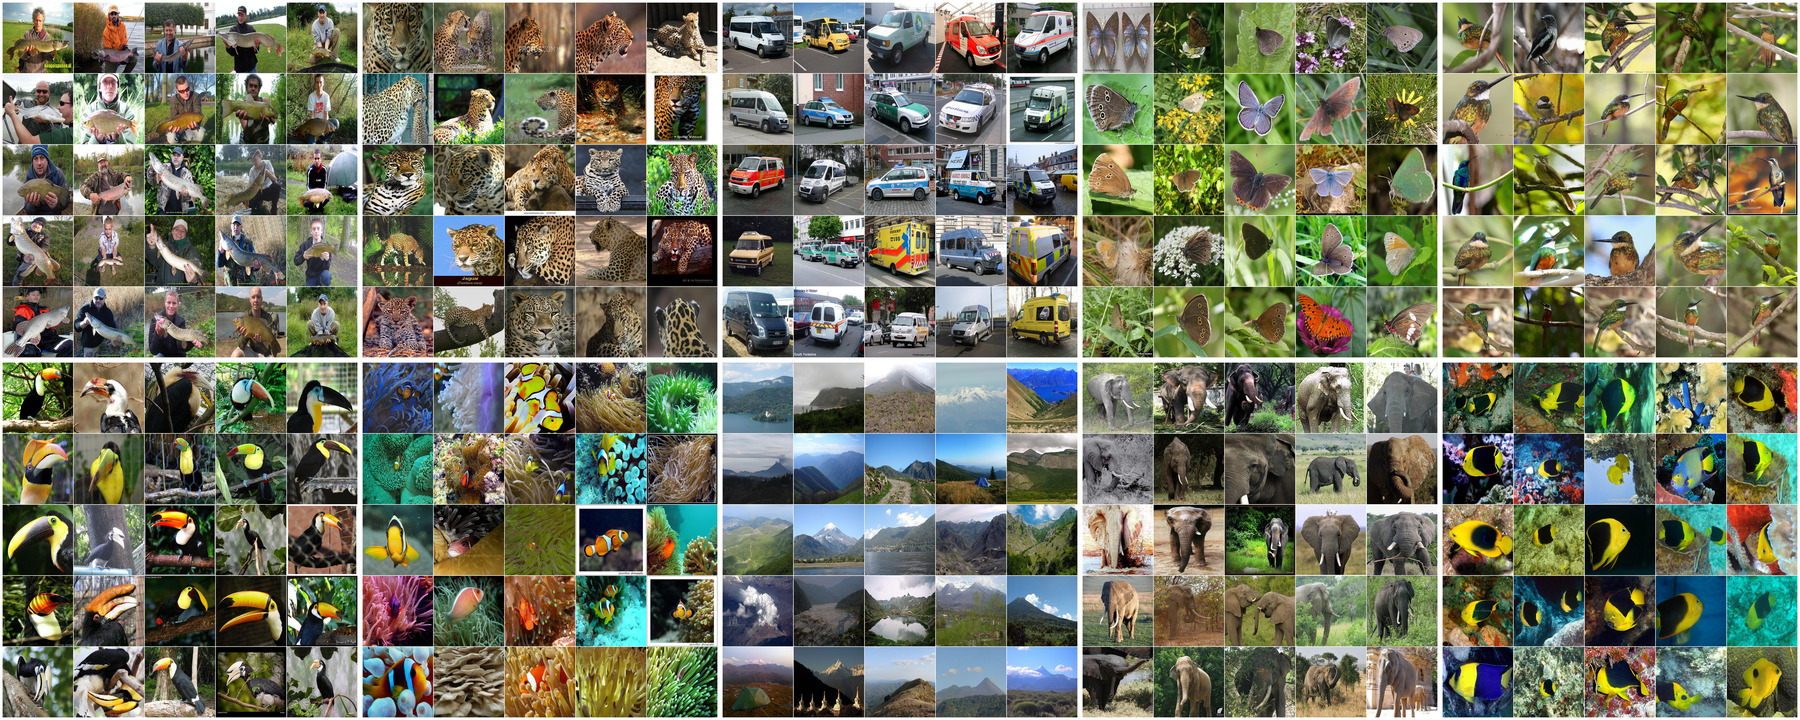

* Historic application of clustering
>* In the 1850s, John Snow performed pioneering data analysis to prove his hypothesis that cholera was spread by the drinking of water infected with cholera bacteria.  $\cdots$ The cholera outbreak occurred in the Soho District of London, in and around Broad Street. As shown in the figure, Dr. Snow plotted each cholera case on a map and also plotted houses with multiple cases. The cases were not distributed uniformly, but rather were distributed in a tight cluster around a water pump located on Broad Street (now Broadwick Street). Dr. Snow disabled the water pump by removing its handle. The Broad Street cholera outbreak stopped almost literally overnight.
>* Original map by John Snow showing the clusters of cholera cases in the London epidemic of 1854, drawn and lithographed by Charles Cheffins.

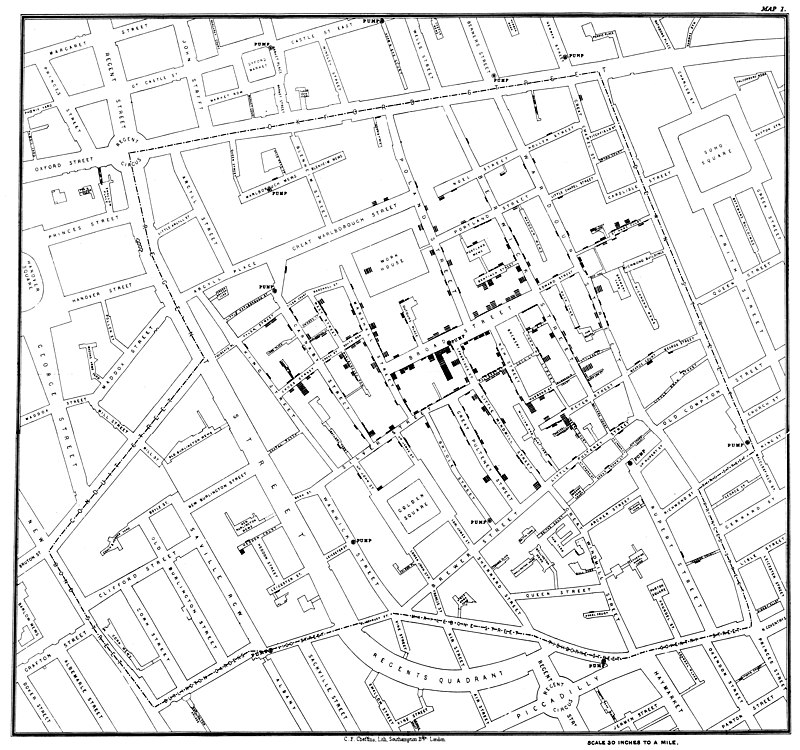

## **K-Means Clustering**

* One of the simplest clustering methods is *k*-means, in which the number of clusters $k$ is chosen in advance, after which the goal is to partition the inputs into sets $S_1, \ldots, S_k$ in a way that minimizes the total sum of squared distances from each point to the mean of its assigned cluster.

* There are a lot of ways to assign $n$ points to $k$ clusters, which means that finding an optimal clustering is a very hard problem. We'll settle for an iterative algorithm that usually finds a good clustering:
>1. Start with a set of _k_-means, which are points in $d$-dimensional space.
>2. Assign each point to the mean to which it is closest.
>3. If no point's assignment has changed, stop and keep the clusters.
>4. If some point's assignment has changed, recompute the means and return to
step 2.

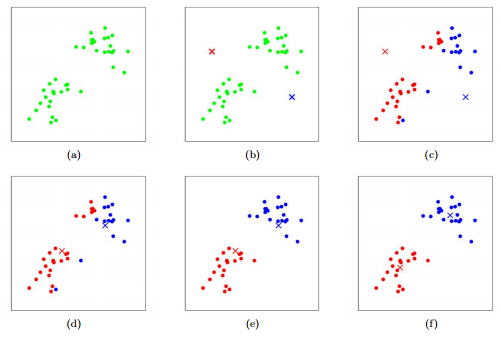

In [ ]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1, 2, 3], [2, 1, 3]) == 2
assert num_differences([1, 2], [1, 2]) == 0

from typing import List

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

import itertools
import random
import tqdm

class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]

                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

## **Example: Meetups**

* To celebrate DataSciencester's growth, your VP of User Rewards wants to organize several in-person meetups for your hometown users, complete with beer, pizza, and DataSciencester t-shirts. You know the locations of all your local users, and she'd like you to choose meetup locations that make it convenient for everyone to attend.

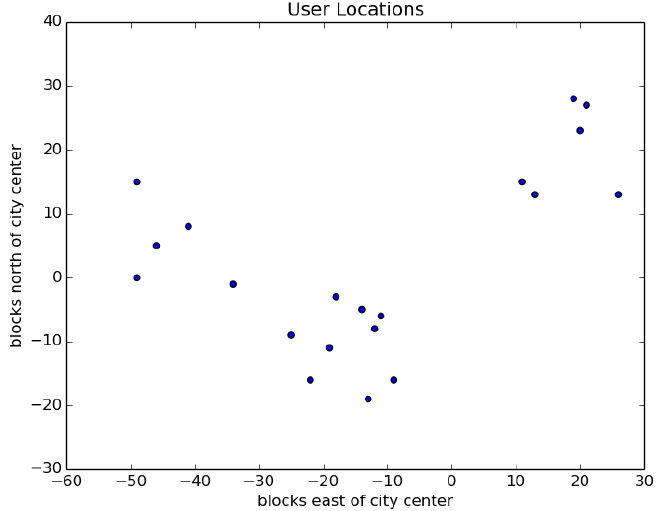

In [ ]:
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
    
random.seed(12)                   # so you get the same results as me
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means)   # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect.
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 5 / 20: : 0it [00:00, ?it/s]


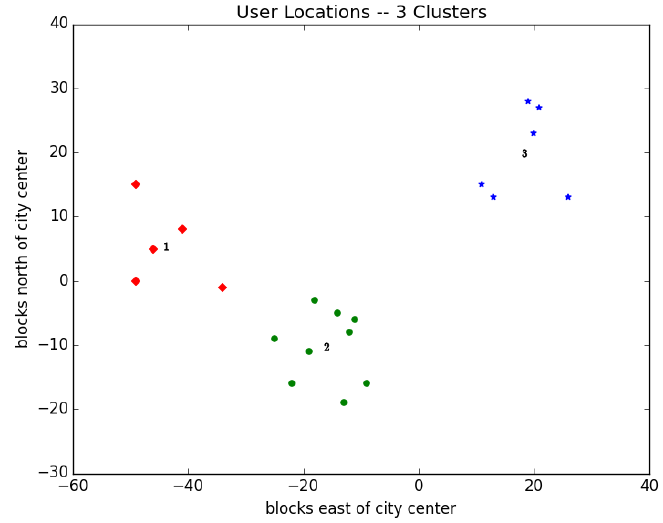

In [ ]:
random.seed(0)
clusterer = KMeans(k=2)
clusterer.train(inputs)
means = sorted(clusterer.means)

assert len(means) == 2
assert squared_distance(means[0], [-26, -5]) < 1
assert squared_distance(means[1], [18, 20]) < 1

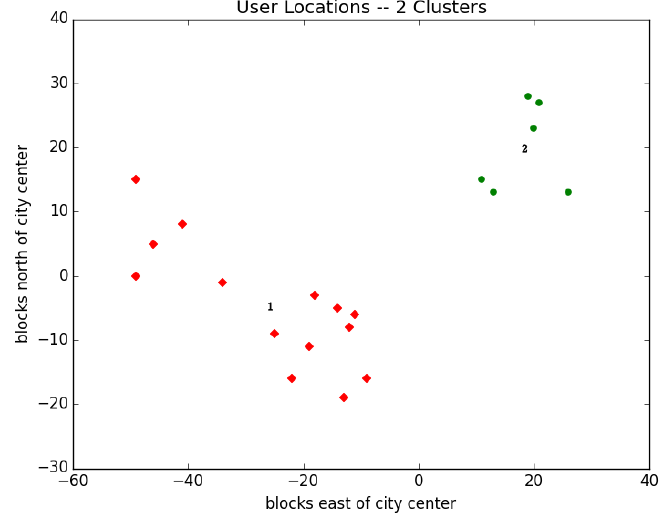

## **Choosing $k$**

* There are various ways to choose a $k$. One that's reasonably easy to understand involves plotting the sum of squared errors (between each point and the mean of its cluster) as a function of $k$ and looking at where the graph bends:

0it [00:00, ?it/s]
changed: 8 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 4 / 20: : 0it [00:00, ?it/s]
changed: 2 / 20: : 0it [00:00, ?it/s]
changed: 4 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 3 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]
changed: 3 / 20: : 0it [00:00, ?it/s]
changed: 3 / 20: : 0it [00:00, ?it/s]
changed: 1 / 20: : 0it [00:00, ?it/s]


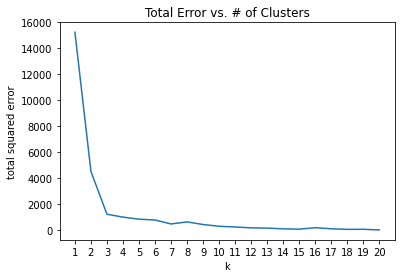

In [ ]:
from matplotlib import pyplot as plt

def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
                for input, cluster in zip(inputs, assignments))

# now plot from 1 up to len(inputs) clusters

ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

## **Example: Clustering Colors**

* The VP of Swag has designed attractive DataSciencester stickers that he'd like you to hand out at meetups. Unfortunately, your sticker printer can print at most five colors per sticker. And since the VP of Art is on sabbatical, the VP of Swag asks if there's some way you can take his design and modify it so that it contains only five colors.

changed: 3 / 360000: : 39it [03:22,  5.20s/it]


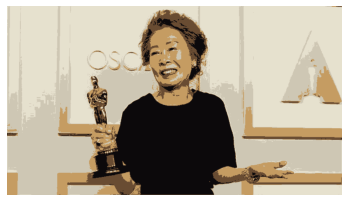

In [ ]:
from skimage import io
orig_img = io.imread("https://ichef.bbci.co.uk/news/800/cpsprodpb/EE48/production/_118200016_whatsubject.jpg")

import matplotlib.image as mpimg
img = orig_img / 256  # rescale to between 0 and 1

# .tolist() converts a numpy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

clusterer = KMeans(5)
clusterer.train(pixels)   # this might take a while

def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)        # index of the closest cluster
    return clusterer.means[cluster]            # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row]   # recolor this row of pixels
            for row in img]                     # for each row in the image

plt.close()
plt.imshow(new_img)
plt.axis('off')
plt.show()

## **Bottom-Up (Aggolmerative) Hierarchical Clustering**

* An alternative approach to clustering is to grow clusters from the bottom up. We can do this in the following way:
>1. Make each input its own cluster of one.
>2. As long as there are multiple clusters remaining, find the two closest clusters and merge them.
* At the end, we'll have one giant cluster containing all the inputs. If we keep track of the merge order, we can re-create any number of clusters by unmerging. 
>* For example, if we want three clusters, we can just undo the last two merges.

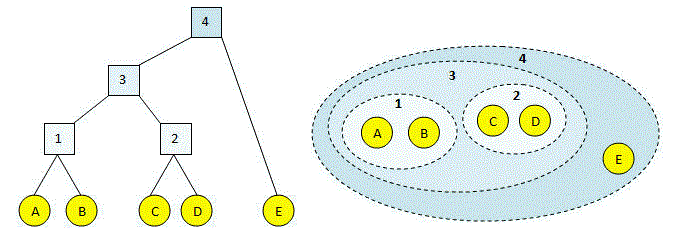

In [ ]:
from typing import NamedTuple, Union

class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10,  20])
leaf2 = Leaf([30, -15])

class Merged(NamedTuple):
    children: tuple
    order: int

merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10, 20], [30, -15]]

* In order to merge the closest clusters, we need some notion of the **distance** between clusters. 

* We'll use the *minimum* distance between elements of the two clusters, which merges the two clusters that are closest to touching (but will sometimes produce large chain-like clusters that aren't very tight). 

* If we wanted tight spherical clusters, we might use the *maximum* distance instead, as it merges the two clusters that fit in the smallest ball. 

* Both are common choices, as is the *average* distance:

In [ ]:
from typing import Callable

def cluster_distance(cluster1: Cluster,
                     cluster2: Cluster,
                     distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                         for v1 in get_values(cluster1)
                         for v2 in get_values(cluster2)])

def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float('inf')  # was never merged
    else:
        return cluster.order

from typing import Tuple

def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

def bottom_up_cluster(inputs: List[Vector],
                      distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]

    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)

    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the two closest clusters
        c1, c2 = min(((cluster1, cluster2)
                      for i, cluster1 in enumerate(clusters)
                      for cluster2 in clusters[:i]),
                      key=pair_distance)

        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]

        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))

        # and add their merge
        clusters.append(merged_cluster)

    # when there's only one cluster left, return it
    return clusters[0]

def generate_clusters(base_cluster: Cluster,
                      num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]

    # as long as we don't have enough clusters yet...
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]

        # and add its children to the list (i.e., unmerge it)
        clusters.extend(get_children(next_cluster))

    # once we have enough clusters...
    return clusters

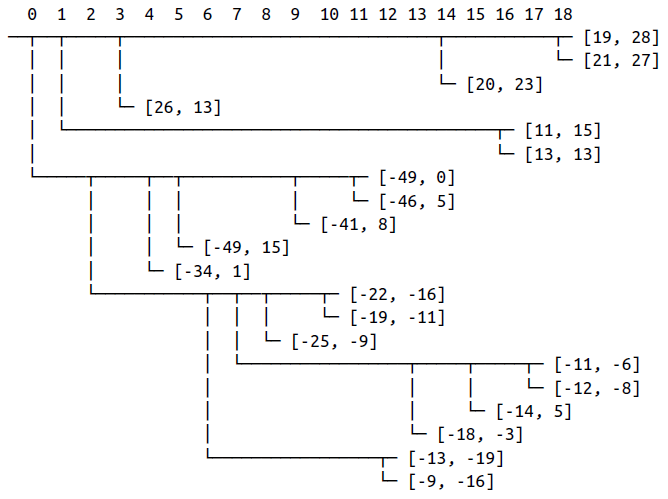

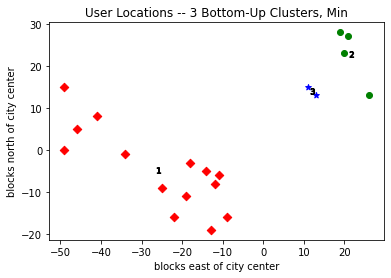

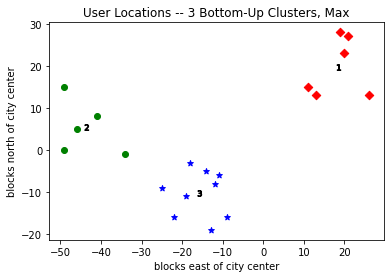

In [ ]:
base_cluster = bottom_up_cluster(inputs)

three_clusters = [get_values(cluster)
                  for cluster in generate_clusters(base_cluster, 3)]

# sort smallest to largest
tc = sorted(three_clusters, key=len)
assert len(tc) == 3
assert [len(c) for c in tc] == [2, 4, 14]
assert sorted(tc[0]) == [[11, 15], [13, 13]]

for i, cluster, marker, color in zip([1, 2, 3],
                                      three_clusters,
                                      ['D','o','*'],
                                      ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

base_cluster_max = bottom_up_cluster(inputs, max)
three_clusters_max = [get_values(cluster)
                      for cluster in generate_clusters(base_cluster_max, 3)]

for i, cluster, marker, color in zip([1, 2, 3],
                                      three_clusters_max,
                                      ['D','o','*'],
                                      ['r','g','b']):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)

    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x, y, marker='$' + str(i) + '$', color='black')

plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()